In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/data.csv')
df.head()

,OBJECTID,STATION,COMMENTS,COUNTY,ABPair,Sta_Dir,Motorcycles,PassCars,Buses,SUTrucks,...,TOD,TotVol,StartDate,EndDate,TimeLabel,AllTrucks,IsPerm,PickupsPanelVans,XCOORD,YCOORD
0,1,301502,Sycolin Rd from 53-653 S. Shreve Mill Rd to SC...,Loudoun County,3865738153,301502_W,3,696,30,48,...,AM,887,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,50,NaN,110,-77.552040,39.069540
1,2,301502,Sycolin Rd from 53-653 S. Shreve Mill Rd to SC...,Loudoun County,3815338657,301502_E,3,1502,49,64,...,AM,1919,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,66,NaN,300,-77.551983,39.069347
2,3,1701,ROCHAMBEAU BRG SW between INTERSTATE 395 VA an...,District of Columbia,2139030364,1701_S,45,16784,177,483,...,AM,18972,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,595,P,1370,-77.035875,38.879244
3,4,1202,INTERSTATE 66 ON ROSSEVELT MEMORIAL BRG,District of Columbia,2027220001,1202_W,51,5272,50,67,...,AM,5830,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,142,P,315,-77.059594,38.892328
4,5,3902,FRANCIS SCOTT KEY BRG NW between M ST NW and W...,District of Columbia,2060130365,3902_S,54,2981,23,138,...,AM,4257,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,616,P,583,-77.069735,38.902649


Count the number of Stations in each County

In [3]:
station_count = df[['OBJECTID', 'COUNTY']].groupby('COUNTY').count()

Vehicle Counts in each county

In [4]:
df.columns

Index(['OBJECTID', 'STATION', 'COMMENTS', 'COUNTY', 'ABPair', 'Sta_Dir',
       'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TOD',
       'TotVol', 'StartDate', 'EndDate', 'TimeLabel', 'AllTrucks', 'IsPerm',
       'PickupsPanelVans', 'XCOORD', 'YCOORD'],
      dtype='object')

In [5]:
car_types = ['COUNTY', 'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TotVol']

car_sums = df[car_types].groupby('COUNTY').sum()
car_sums['Station_count'] = station_count

In [6]:
car_sums

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,TotVol,Station_count
COUNTY,,,,,,,
Anne Arundel County,439,200504,2581,8951,3155,252433,92
Arlington County,130,24857,353,341,55,28641,8
Baltimore County,24,19897,132,743,821,24414,4
Calvert County,269,81981,1140,5208,1532,112808,62
Carroll County,57,26675,313,2075,742,35727,26
Charles County,140,36522,705,2307,899,49164,42
City of Fairfax,30,11534,187,232,148,13768,10
Clarke County,15,5718,65,133,458,7958,4
District of Columbia,1079,221408,3428,13418,3268,267541,59


In [7]:
import matplotlib.pyplot as plt

plt.bar(car_sums.Station_count, car_sums.TotVol)

<Container object of 25 artists>

Create a csv that contains geolocation for each station

In [8]:
geo = ['STATION', 'XCOORD', 'YCOORD']
geo_info = df[geo].groupby('STATION').mean()
geo_info.head()

,XCOORD,YCOORD
STATION,,
1202,-77.059594,38.892328
1403,-76.989517,38.871882
1501,-77.032551,38.879280
1503,-77.015191,38.903539
160001,-77.409360,38.456580


In [9]:
totals = df[['STATION', 'TotVol']].groupby('STATION').sum()
totals.head()

,TotVol
STATION,
1202,19028
1403,13667
1501,33959
1503,10057
160001,9031


In [10]:
geo_info['TotVol'] = totals.TotVol

In [11]:
geo_info.head()

,XCOORD,YCOORD,TotVol
STATION,,,
1202,-77.059594,38.892328,19028
1403,-76.989517,38.871882,13667
1501,-77.032551,38.879280,33959
1503,-77.015191,38.903539,10057
160001,-77.409360,38.456580,9031


In [12]:
geo_info.to_csv('coords.csv', index=False)

In [13]:
!head coords.csv

XCOORD,YCOORD,TotVol
-77.05959412,38.89232808,19028
-76.98951707,38.87188215,13667
-77.03255136,38.87927969,33959
-77.01519097,38.90353874,10057
-77.40935999999999,38.456579999999995,9031
-77.50837,38.138729999999995,6614
-77.09470999999999,38.32395,3117
-77.50761,38.2179,3385
-77.68189,38.31289,4365


After plotting these coordinates on a map we could tell most traffic was in Washington DC. Now the question was are we sure this is people entering DC. The answer we expect is, well, yes, because our data is 6AM to 9AM, but what does the data say?

In [14]:
(df.COUNTY != 'District of Columbia').sum()

834

In [15]:
# 38.9072° N, 77.0369° W from google

dc_xcoord = -77.0369 
dc_ycoord = 38.9072

dir_data = df.loc[df.COUNTY != 'District of Columbia']
dir_data

,OBJECTID,STATION,COMMENTS,COUNTY,ABPair,Sta_Dir,Motorcycles,PassCars,Buses,SUTrucks,...,TOD,TotVol,StartDate,EndDate,TimeLabel,AllTrucks,IsPerm,PickupsPanelVans,XCOORD,YCOORD
0,1,301502,Sycolin Rd from 53-653 S. Shreve Mill Rd to SC...,Loudoun County,3865738153,301502_W,3,696,30,48,...,AM,887,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,50,NaN,110,-77.552040,39.069540
1,2,301502,Sycolin Rd from 53-653 S. Shreve Mill Rd to SC...,Loudoun County,3815338657,301502_E,3,1502,49,64,...,AM,1919,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,66,NaN,300,-77.551983,39.069347
18,19,80336,VA7 from Frederick County Line to Bus SR 7 Wes...,Clarke County,5402654010,80336_W,4,1364,16,29,...,AM,1851,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,113,P,354,-78.052990,39.176040
19,20,90049,VA7 from 53-760 Near Bluemont to Bus SR 7 West...,Loudoun County,3824538401,90049_W,3,906,21,32,...,AM,1287,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,66,P,291,-77.780330,39.129120
20,21,90063,"VA7 from SR 9, Bus SR 7 Clarkes Gap to Bus SR ...",Loudoun County,3837838130,90063_W,8,1929,40,142,...,AM,2847,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,204,P,667,-77.594120,39.136500
21,22,60148,US1 from 89-610 Garrisonville Rd to 89-639 Woo...,Stafford County,5102951030,60148_S,1,1040,22,29,...,AM,1320,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,37,P,221,-77.394260,38.474560
22,23,90170,"US1 from SR 235 S, Mount Vernon Memorial Hwy t...",Fairfax County,3427534155,90170_S,3,2720,49,41,...,AM,3297,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,54,P,471,-77.129300,38.718860
23,24,160015,US1 from 88-608 Massaponax Church Rd to US 17 ...,Spotsylvania County,5214952016,160015_S,0,964,35,53,...,AM,1403,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,85,NaN,319,-77.507610,38.217900
24,25,301471,Evergreen Mills Rd from 53-617 Red Hill Rd; 53...,Loudoun County,3816838398,301471_S,2,1107,16,20,...,AM,1470,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,24,NaN,322,-77.573820,39.010990
25,26,190143,VA7 from SR 7 Between Round Hill and Purcellvi...,Loudoun County,3853038402,190143_W,1,356,18,21,...,AM,518,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,25,NaN,119,-77.751240,39.136670


In [16]:
dir_data = dir_data[['STATION', 'Sta_Dir', 'TotVol', 'XCOORD', 'YCOORD']]
dir_data.head()

,STATION,Sta_Dir,TotVol,XCOORD,YCOORD
0,301502,301502_W,887,-77.552040,39.069540
1,301502,301502_E,1919,-77.551983,39.069347
18,80336,80336_W,1851,-78.052990,39.176040
19,90049,90049_W,1287,-77.780330,39.129120
20,90063,90063_W,2847,-77.594120,39.136500


In [17]:
#grab the direction letter from the back of Sta_Dir
dir_data['direction'] = dir_data.Sta_Dir.copy().str.slice(-1)

C:\Users\m202562\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
dir_data.head()

,STATION,Sta_Dir,TotVol,XCOORD,YCOORD,direction
0,301502,301502_W,887,-77.552040,39.069540,W
1,301502,301502_E,1919,-77.551983,39.069347,E
18,80336,80336_W,1851,-78.052990,39.176040,W
19,90049,90049_W,1287,-77.780330,39.129120,W
20,90063,90063_W,2847,-77.594120,39.136500,W


In [19]:
into_dc = [] #1 is into DC, 0 is out of DC

for idex, row in dir_data.iterrows():
    
    if row.direction == 'W': #traffic going west
        into_dc.append(row.XCOORD > dc_xcoord) #true if heading to DC
    elif row.direction == 'E':
        into_dc.append(row.XCOORD < dc_xcoord)
    elif row.direction == 'N':
        into_dc.append(row.YCOORD < dc_ycoord)
    elif row.direction == 'S':
        into_dc.append(row.YCOORD > dc_ycoord)
    else:
        into_dc.append(-1)

dir_data['into_dc'] = into_dc
dir_data.head()

C:\Users\m202562\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,STATION,Sta_Dir,TotVol,XCOORD,YCOORD,direction,into_dc
0,301502,301502_W,887,-77.552040,39.069540,W,False
1,301502,301502_E,1919,-77.551983,39.069347,E,True
18,80336,80336_W,1851,-78.052990,39.176040,W,False
19,90049,90049_W,1287,-77.780330,39.129120,W,False
20,90063,90063_W,2847,-77.594120,39.136500,W,False


In [20]:
dir_vol = dir_data[['into_dc', 'TotVol']].groupby('into_dc').sum()
dir_vol

,TotVol
into_dc,
False,780870
True,1064744


<Container object of 2 artists>

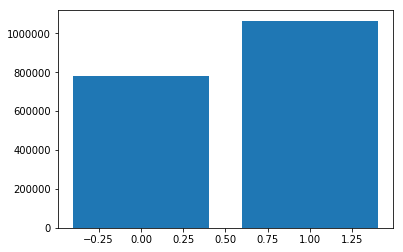

In [21]:
plt.bar(dir_vol.index,dir_vol.TotVol)

In [22]:
dir_data[['TotVol', 'XCOORD', 'YCOORD', 'direction', 'into_dc']].to_csv('dir_coord.csv', index=False)

In [23]:
dir_data.shape

(834, 7)

In [24]:
car_types = ['STATION', 'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TotVol']

type_vol = df[car_types].groupby('STATION').sum()

In [25]:
type_vol['XCOORD'] = geo_info.XCOORD
type_vol['YCOORD'] = geo_info.YCOORD
type_vol.head()

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,TotVol,XCOORD,YCOORD
STATION,,,,,,,,
1202,85,16278,167,295,145,19028,-77.059594,38.892328
1403,19,11671,159,334,33,13667,-76.989517,38.871882
1501,56,32020,101,457,90,33959,-77.032551,38.879280
1503,43,8367,60,305,84,10057,-77.015191,38.903539
160001,13,6292,95,202,783,9031,-77.409360,38.456580


In [26]:
type_vol.to_csv('type_vol.csv', index=False)

Calculate number of passenger vehicles vs trucks

In [27]:
df.columns

Index(['OBJECTID', 'STATION', 'COMMENTS', 'COUNTY', 'ABPair', 'Sta_Dir',
       'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TOD',
       'TotVol', 'StartDate', 'EndDate', 'TimeLabel', 'AllTrucks', 'IsPerm',
       'PickupsPanelVans', 'XCOORD', 'YCOORD'],
      dtype='object')

In [28]:
f = ['STATION', 'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'PickupsPanelVans']

numbers = df[f].groupby('STATION').sum()

In [29]:
numbers['passenger'] = numbers.Motorcycles + numbers.PassCars + numbers.Buses + numbers.PickupsPanelVans
numbers['work'] = numbers.SUTrucks + numbers.CTrucks
numbers.head()

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,PickupsPanelVans,passenger,work
STATION,,,,,,,,
1202,85,16278,167,295,145,2059,18589,440
1403,19,11671,159,334,33,1452,13301,367
1501,56,32020,101,457,90,1236,33413,547
1503,43,8367,60,305,84,1197,9667,389
160001,13,6292,95,202,783,1645,8045,985


In [30]:
numbers['p-w-ratio'] = numbers.passenger / numbers.work

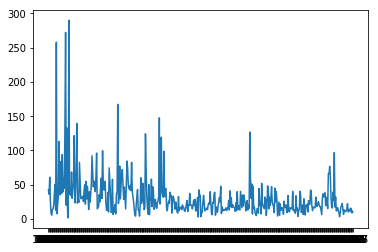

In [31]:
plt.plot(numbers['p-w-ratio'])

In [32]:
numbers['p-w-ratio'].mean()

31.02881954216701

In [33]:
numbers['p-w-ratio'].idxmax()

'301454'

In [34]:
numbers.loc['301454']

Motorcycles            1.000000
PassCars            1843.000000
Buses                  6.000000
SUTrucks               4.000000
CTrucks                3.000000
PickupsPanelVans     179.000000
passenger           2029.000000
work                   7.000000
p-w-ratio            289.857143
Name: 301454, dtype: float64

In [35]:
numbers.loc[[numbers['p-w-ratio'].idxmax(), numbers['p-w-ratio'].idxmin()]].to_csv('test.csv', index=False)

In [36]:
numbers['XCOORD'] = geo_info.XCOORD
numbers['YCOORD'] = geo_info.YCOORD

In [37]:
car_types = ['STATION', 'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'PickupsPanelVans', 'TotVol']

car_info = df[car_types].groupby('STATION').sum()

In [38]:
axle_ESAL = {'Motorcycles': 0.007, 'PassCars':0.0008, 'Buses':0.6806, 'SUTrucks':0.189, 'CTrucks':2.3719, 'PickupsPanelVans':0.0122}

In [39]:
for key in axle_ESAL:
    
    car_info[key+'ESAL'] = car_info[key] * axle_ESAL[key]

car_info.head()

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,PickupsPanelVans,TotVol,MotorcyclesESAL,PassCarsESAL,BusesESAL,SUTrucksESAL,CTrucksESAL,PickupsPanelVansESAL
STATION,,,,,,,,,,,,,
1202,85,16278,167,295,145,2059,19028,0.595,13.0224,113.6602,55.755,343.9255,25.1198
1403,19,11671,159,334,33,1452,13667,0.133,9.3368,108.2154,63.126,78.2727,17.7144
1501,56,32020,101,457,90,1236,33959,0.392,25.6160,68.7406,86.373,213.4710,15.0792
1503,43,8367,60,305,84,1197,10057,0.301,6.6936,40.8360,57.645,199.2396,14.6034
160001,13,6292,95,202,783,1645,9031,0.091,5.0336,64.6570,38.178,1857.1977,20.0690


In [40]:
car_info['ESAL'] = car_info.MotorcyclesESAL + car_info.PassCarsESAL + car_info.BusesESAL + car_info.SUTrucksESAL + car_info.CTrucksESAL + car_info.PickupsPanelVansESAL

car_info['XCOORD'] = geo_info.XCOORD
car_info['YCOORD'] = geo_info.YCOORD

In [41]:
car_info.to_csv('ESAL.csv', index=False)

In [42]:
md_income = pd.read_csv('Maryland_Per_Capita_Personal_Income_Projections__in_Constant_2009_Dollars__1970-2040.csv')
md_income.head()

,Date created,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,2018-08-02T00:00:00.000,1970,21850.0,15513.0,20728.0,18245.0,22537.0,18047.0,15951.0,18713.0,...,16956.0,32293.0,23307.0,18933.0,19218.0,12502.0,20044.0,17067.0,17627.0,16853.0
1,2018-08-02T00:00:00.000,1980,26107.0,18535.0,27118.0,21425.0,27714.0,23883.0,16301.0,24974.0,...,19171.0,36928.0,25281.0,22894.0,19933.0,13752.0,26156.0,21030.0,17994.0,18025.0
2,2018-08-02T00:00:00.000,1990,34205.0,22761.0,34360.0,26829.0,35777.0,32814.0,22372.0,31537.0,...,28799.0,48292.0,33245.0,32500.0,27053.0,18953.0,36509.0,24630.0,25619.0,29940.0
3,2018-08-02T00:00:00.000,2000,42688.0,25415.0,46013.0,30543.0,44564.0,38347.0,27553.0,39913.0,...,38135.0,62308.0,36117.0,43047.0,36543.0,23680.0,48393.0,30314.0,30100.0,35440.0
4,2018-08-02T00:00:00.000,2005,46934.0,31102.0,51995.0,33233.0,47381.0,44645.0,32683.0,43269.0,...,45919.0,69305.0,37472.0,47037.0,40887.0,24263.0,57701.0,34153.0,33473.0,41739.0


In [43]:
md_income

,Date created,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,2018-08-02T00:00:00.000,1970,21850.0,15513.0,20728.0,18245.0,22537.0,18047.0,15951.0,18713.0,...,16956.0,32293.0,23307.0,18933.0,19218.0,12502.0,20044.0,17067.0,17627.0,16853.0
1,2018-08-02T00:00:00.000,1980,26107.0,18535.0,27118.0,21425.0,27714.0,23883.0,16301.0,24974.0,...,19171.0,36928.0,25281.0,22894.0,19933.0,13752.0,26156.0,21030.0,17994.0,18025.0
2,2018-08-02T00:00:00.000,1990,34205.0,22761.0,34360.0,26829.0,35777.0,32814.0,22372.0,31537.0,...,28799.0,48292.0,33245.0,32500.0,27053.0,18953.0,36509.0,24630.0,25619.0,29940.0
3,2018-08-02T00:00:00.000,2000,42688.0,25415.0,46013.0,30543.0,44564.0,38347.0,27553.0,39913.0,...,38135.0,62308.0,36117.0,43047.0,36543.0,23680.0,48393.0,30314.0,30100.0,35440.0
4,2018-08-02T00:00:00.000,2005,46934.0,31102.0,51995.0,33233.0,47381.0,44645.0,32683.0,43269.0,...,45919.0,69305.0,37472.0,47037.0,40887.0,24263.0,57701.0,34153.0,33473.0,41739.0
5,2018-08-02T00:00:00.000,2010,49069.0,31565.0,52155.0,37093.0,48433.0,49169.0,33616.0,47202.0,...,44360.0,69675.0,40199.0,48103.0,46012.0,24965.0,56230.0,36170.0,33773.0,43656.0
6,2018-08-02T00:00:00.000,2015,51354.0,33771.0,55624.0,41155.0,49893.0,51338.0,38543.0,51328.0,...,48663.0,71177.0,40875.0,51580.0,47296.0,26844.0,59817.0,38633.0,35369.0,50406.0
7,2018-08-02T00:00:00.000,2016,52431.0,34657.0,56361.0,42485.0,50824.0,52102.0,39005.0,52101.0,...,49350.0,73127.0,41698.0,52337.0,48018.0,26690.0,60486.0,39261.0,35876.0,51252.0
8,2018-08-02T00:00:00.000,2020,56854.0,36135.0,63934.0,49076.0,56094.0,52566.0,38525.0,51674.0,...,55114.0,77059.0,44002.0,57493.0,32281.0,51220.0,65581.0,41584.0,38710.0,51903.0
9,2018-08-02T00:00:00.000,2025,60112.0,38496.0,68365.0,52681.0,58603.0,55490.0,40996.0,54504.0,...,59415.0,80945.0,45980.0,61273.0,34138.0,54973.0,69764.0,44166.0,40370.0,55404.0


In [44]:
md_income.iloc[7]

Date created              2018-08-02T00:00:00.000
Year                                         2016
MARYLAND                                    52431
Allegany County                             34657
Anne Arundel County                         56361
Baltimore City                              42485
Baltimore County                            50824
Calvert County                              52102
Caroline County                             39005
Carroll County                              52101
Cecil County                                39889
Charles County                              48404
Dorchester County                           38298
Frederick County                            50642
Garrett County                              37517
Harford County                              48981
Howard County                               64910
Kent County                                 49350
Montgomery County                           73127
Prince George's County                      41698


In [45]:
car_sums

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,TotVol,Station_count
COUNTY,,,,,,,
Anne Arundel County,439,200504,2581,8951,3155,252433,92
Arlington County,130,24857,353,341,55,28641,8
Baltimore County,24,19897,132,743,821,24414,4
Calvert County,269,81981,1140,5208,1532,112808,62
Carroll County,57,26675,313,2075,742,35727,26
Charles County,140,36522,705,2307,899,49164,42
City of Fairfax,30,11534,187,232,148,13768,10
Clarke County,15,5718,65,133,458,7958,4
District of Columbia,1079,221408,3428,13418,3268,267541,59


In [46]:
per_capita_income = {'Anne Arundel County' : 41315, 'Arlington County': 57724,
                  'Baltimore County': 34701, 'Calvert County': 38633, 'Carroll County': 36936,
                   'Charles County': 37223, 'City of Fairfax': 44008, 'Clarke County':34630,
                  'District of Columbia':70710, 'Fairfax County':49001, 'Falls Church':55389,
                  'Fauquier County':38710, 'Frederick County':27977, 'Fredericksburg':27870,
                  'Howard County':48243, 'King George County':32630, 'Loudoun County':45356,
                  'Montgomery County':22040, 'Prince George\'s County':25769, 
                   'Prince William County':35737, 'Spotsylvania County':31012, 
                   'St Mary\'s County':36602, 'Stafford County':34691, 'Warren County':29098,
                  'Washington County': 23488}

In [47]:
df.columns

Index(['OBJECTID', 'STATION', 'COMMENTS', 'COUNTY', 'ABPair', 'Sta_Dir',
       'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks', 'TOD',
       'TotVol', 'StartDate', 'EndDate', 'TimeLabel', 'AllTrucks', 'IsPerm',
       'PickupsPanelVans', 'XCOORD', 'YCOORD'],
      dtype='object')

In [48]:
data = df.groupby('COUNTY').max()
data.head()

,OBJECTID,STATION,COMMENTS,ABPair,Sta_Dir,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,TOD,TotVol,StartDate,EndDate,TimeLabel,AllTrucks,PickupsPanelVans,XCOORD,YCOORD
COUNTY,,,,,,,,,,,,,,,,,,,
Anne Arundel County,881,P0038,US 50/IS 595 West of MD 424 (ATR#24),4591845917,P0038_W,31,10517,248,413,271,AM,12648,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,672,1676,-76.485200,39.233553
Arlington County,606,90217,VA120 from SR 237 Fairfax Dr to US 50,3064030135,90217_W,87,7940,98,72,14,AM,9059,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,84,874,-77.058560,38.890080
Baltimore County,887,P0053,MD88-.20 MI E OF CARROLL CO/L,4418644098,P0053_W,13,9427,72,390,409,AM,11630,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,799,1446,-76.766682,39.600703
Calvert County,877,P0065,POND WOODS RD-.10 MI E OF MD2,4913245555,P0065_S,17,4428,69,218,67,AM,5592,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,281,1013,-76.432380,38.759827
Carroll County,869,P0007,YORK ST-.10 MI N OF MD30,4813148086,P0007_S,14,5327,25,345,138,AM,6950,2017-01-01T06:00:00.000Z,2017-01-01T08:59:59.000Z,AM: 6:00 AM – 8:59 AM,483,1102,-76.847305,39.662200


In [49]:
data.drop(['OBJECTID', 'STATION', 'COMMENTS', 'ABPair', 'Sta_Dir', 'StartDate', 'EndDate', 
          'TimeLabel', 'TOD'], axis=1, inplace=True)
data.head()

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,TotVol,AllTrucks,PickupsPanelVans,XCOORD,YCOORD
COUNTY,,,,,,,,,,
Anne Arundel County,31,10517,248,413,271,12648,672,1676,-76.485200,39.233553
Arlington County,87,7940,98,72,14,9059,84,874,-77.058560,38.890080
Baltimore County,13,9427,72,390,409,11630,799,1446,-76.766682,39.600703
Calvert County,17,4428,69,218,67,5592,281,1013,-76.432380,38.759827
Carroll County,14,5327,25,345,138,6950,483,1102,-76.847305,39.662200


In [50]:
data['per_capita_income'] = [per_capita_income[key] for key in per_capita_income]
data    

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,TotVol,AllTrucks,PickupsPanelVans,XCOORD,YCOORD,per_capita_income
COUNTY,,,,,,,,,,,
Anne Arundel County,31,10517,248,413,271,12648,672,1676,-76.485200,39.233553,41315
Arlington County,87,7940,98,72,14,9059,84,874,-77.058560,38.890080,57724
Baltimore County,13,9427,72,390,409,11630,799,1446,-76.766682,39.600703,34701
Calvert County,17,4428,69,218,67,5592,281,1013,-76.432380,38.759827,38633
Carroll County,14,5327,25,345,138,6950,483,1102,-76.847305,39.662200,36936
Charles County,18,3876,50,216,129,4998,278,833,-76.849901,38.631130,37223
City of Fairfax,9,2357,34,49,54,2807,97,321,-77.271090,38.860680,44008
Clarke County,7,2953,25,62,158,4003,220,798,-77.925650,39.188550,34630
District of Columbia,183,23890,398,6471,478,25613,6554,2322,-76.915724,38.983597,70710


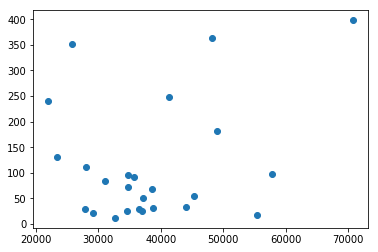

In [51]:
plt.scatter(data.per_capita_income, data.Buses)

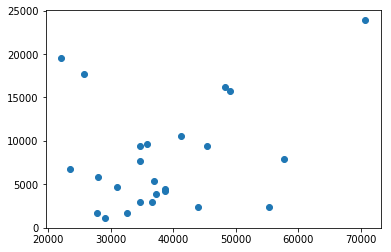

In [52]:
plt.scatter(data.per_capita_income, data.PassCars)

In [53]:
data.to_csv('max_per_county.csv')

In [54]:
car_info['personal'] = car_info.Motorcycles + car_info.PassCars + car_info.PickupsPanelVans

In [55]:
car_info.to_csv('ESAL.csv', index=False)

In [56]:
car_info.columns

Index(['Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks',
       'PickupsPanelVans', 'TotVol', 'MotorcyclesESAL', 'PassCarsESAL',
       'BusesESAL', 'SUTrucksESAL', 'CTrucksESAL', 'PickupsPanelVansESAL',
       'ESAL', 'XCOORD', 'YCOORD', 'personal'],
      dtype='object')

In [57]:
#emissions rates per vehicle in grams/mile co2 emissions
emissions_dict = {'Motorcycles':13.792, 'PassCars':4.183, 'Buses':23.24, 'SUTrucks':6.124, 'CTrucks':2.171,
       'PickupsPanelVans':2.761}

In [58]:
emissions = car_info[['Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks',
       'PickupsPanelVans']]

for key in emissions_dict:
    emissions[key] = emissions[key] * emissions_dict[key]
    
emissions.head()

C:\Users\m202562\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,PickupsPanelVans
STATION,,,,,,
1202,1172.320,68090.874,3881.08,1806.580,314.795,5684.899
1403,262.048,48819.793,3695.16,2045.416,71.643,4008.972
1501,772.352,133939.660,2347.24,2798.668,195.390,3412.596
1503,593.056,34999.161,1394.40,1867.820,182.364,3304.917
160001,179.296,26319.436,2207.80,1237.048,1699.893,4541.845


In [59]:
ratio = emissions.sum()/emissions.sum().sum()
ratio

Motorcycles         0.007667
PassCars            0.781006
Buses               0.059638
SUTrucks            0.050983
CTrucks             0.008467
PickupsPanelVans    0.092238
dtype: float64

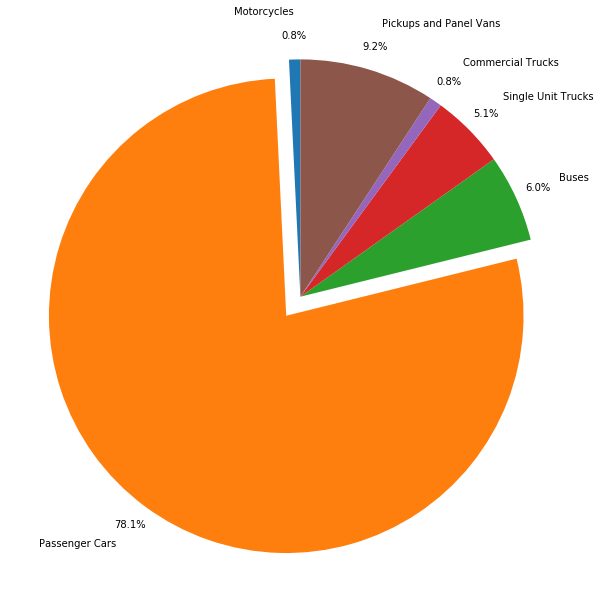

In [60]:
labels = ['Motorcycles', 'Passenger Cars', 'Buses', 'Single Unit Trucks', 'Commercial Trucks','Pickups and Panel Vans']
explode= [0,.1,0,0,0,0]
fig1, ax1 = plt.subplots()
ax1.pie(ratio, labels=labels, explode=explode,startangle=90,autopct='%1.1f%%',
       pctdistance=1.1, labeldistance=1.2)
ax1.axis('equal')
fig1.set_size_inches(10,10)
plt.show()

In [61]:
sta_total = emissions.sum(axis=1).values.reshape(462,1)

In [62]:
import numpy as np
sta_total = np.concatenate((sta_total, sta_total, sta_total, sta_total, sta_total, sta_total), axis = 1)

In [63]:
em_diff = emissions / sta_total

In [64]:
em_diff = em_diff - ratio

In [65]:
em_diff.head()

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,PickupsPanelVans
STATION,,,,,,
1202,0.006815,0.060136,-0.011694,-0.028666,-0.004578,-0.022012
1403,-0.003218,0.047810,0.003095,-0.016258,-0.007251,-0.024178
1501,-0.002284,0.152593,-0.043277,-0.031475,-0.007105,-0.068452
1503,0.006339,0.045582,-0.026706,-0.006870,-0.004160,-0.014185
160001,-0.002712,-0.053655,0.001376,-0.016796,0.038510,0.033278


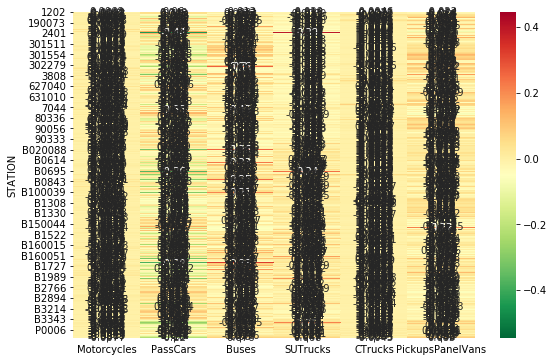

In [66]:
import seaborn as sns

f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(em_diff, annot=True, cmap='RdYlGn_r')

In [67]:
count_em = df.groupby('COUNTY').sum()

In [68]:
county_em = count_em[['Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks',
       'PickupsPanelVans']]
county_em.head()

,Motorcycles,PassCars,Buses,SUTrucks,CTrucks,PickupsPanelVans
COUNTY,,,,,,
Anne Arundel County,439,200504,2581,8951,3155,36909
Arlington County,130,24857,353,341,55,2910
Baltimore County,24,19897,132,743,821,2801
Calvert County,269,81981,1140,5208,1532,22754
Carroll County,57,26675,313,2075,742,5892


In [69]:
for key in emissions_dict:
    county_em[key] = county_em[key] * emissions_dict[key]

C:\Users\m202562\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
county_em.shape

(25, 6)

In [71]:
sta_total = county_em.sum(axis=1).values.reshape(25,1)
sta_total = np.concatenate((sta_total, sta_total, sta_total, sta_total, sta_total, sta_total), axis = 1)

In [72]:
em_diff = county_em / sta_total
em_diff = em_diff - ratio

In [73]:
em_diff.columns=labels

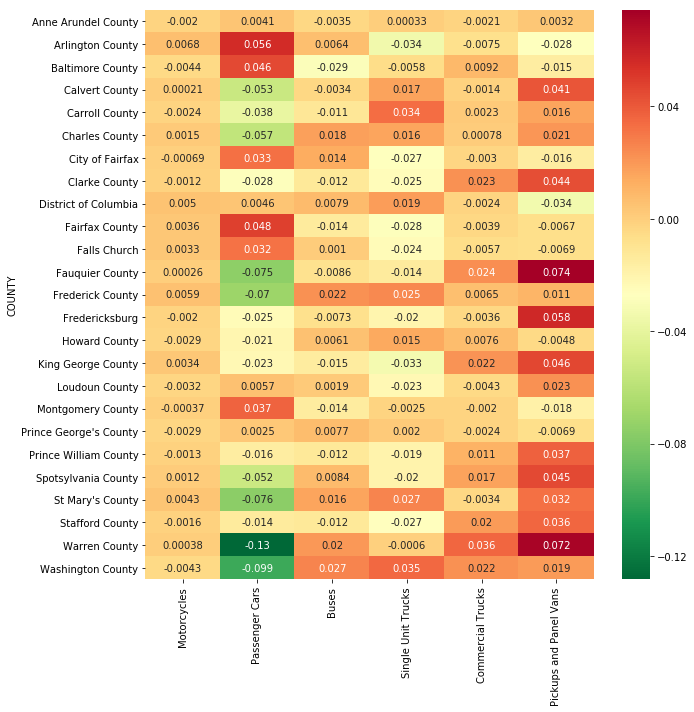

In [74]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(em_diff, annot=True, cmap='RdYlGn_r')
plt.tight_layout()
plt.savefig('heat_map.jpg')

In [75]:
max_locs = df[['STATION', 'Motorcycles', 'PassCars', 'Buses', 'SUTrucks', 'CTrucks',
       'PickupsPanelVans']]



In [84]:
idx = max_locs.groupby('STATION').sum().idxmax().values

In [87]:
max_locs.groupby('STATION').sum().idxmax()

Motorcycles         199760
PassCars              1701
Buses                P0039
SUTrucks              2401
CTrucks              P0039
PickupsPanelVans     P0043
dtype: object

In [93]:
max_coord = geo_info.loc[idx]

In [95]:
max_coord['type'] = ['Motorcycles', 'Passenger Cars', 'Buses', 'Single Unit Trucks', 'Commercial Trucks','Pickups and Panel Vans']
max_coord.to_csv('max_coords.csv')

C:\Users\m202562\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
station_emissions = pd.DataFrame(emissions.sum(axis = 1))
station_emissions['XCOORD'] = geo_info.XCOORD
station_emissions['YCOORD'] = geo_info.YCOORD
station_emissions.head()

,0,XCOORD,YCOORD
STATION,,,
1202,80950.548,-77.059594,38.892328
1403,58903.032,-76.989517,38.871882
1501,143465.906,-77.032551,38.879280
1503,42341.718,-77.015191,38.903539
160001,36185.318,-77.409360,38.456580


In [102]:
station_emissions.to_csv('station_emissions.csv')